Question 3

Use SVM to classify a multi-class dataset and experiment with different kernels (linear, RBF, polynomial). Build a confusion matrix and calculate all metrics (accuracy, precision, recall, F1-score and draw a ROC curve also explain your results).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv(r"C:\Users\SASWATA\OneDrive\Desktop\ML_PRAC\ML_PRAC\WineQT.csv")

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [13]:
df=df.drop('Id',axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
import seaborn as sns

In [21]:
corr=df.corr()

<Axes: >

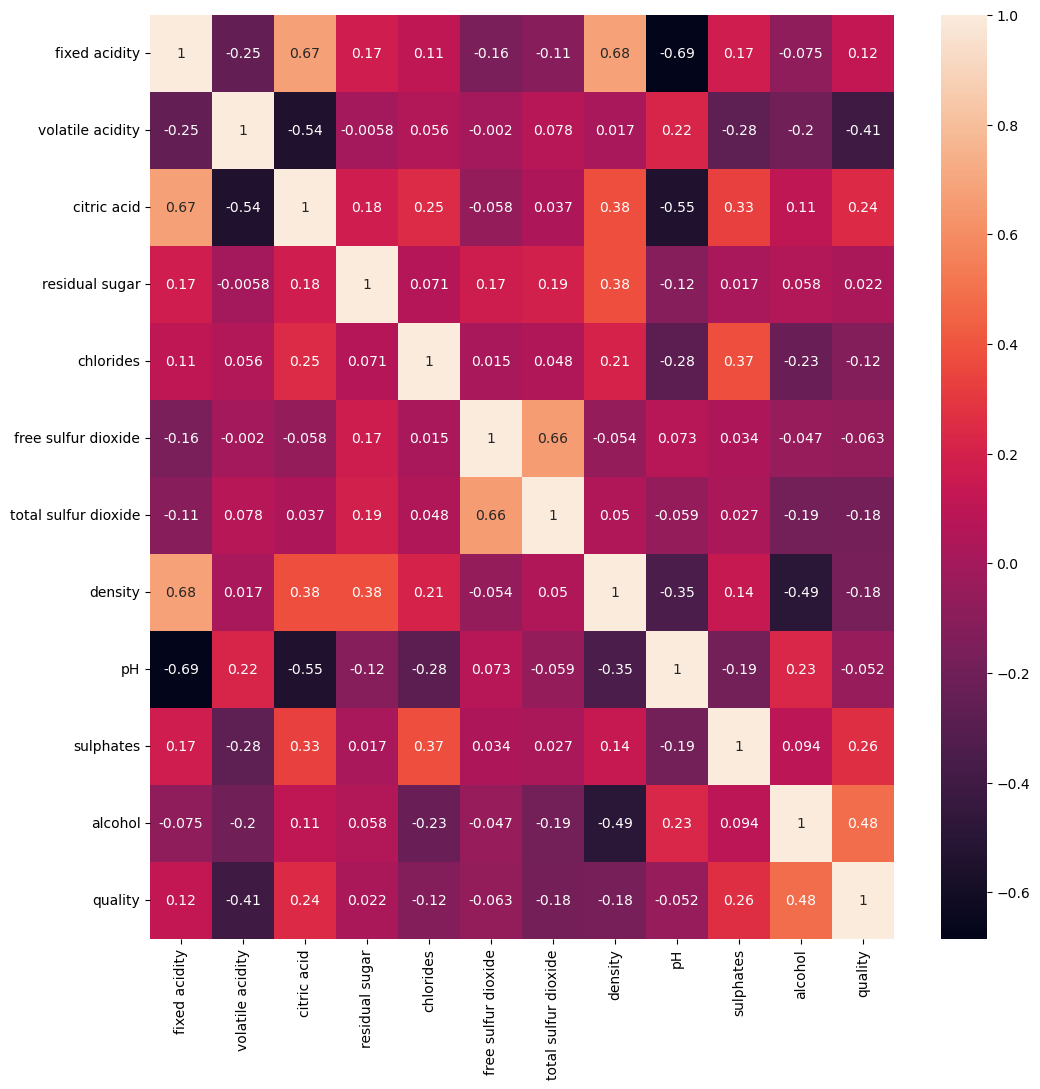

In [31]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True)

quality hioghly depends on alcohol conetent and citric acid

In [9]:
y=df.iloc[:,-1].values

In [10]:
x=df.iloc[:,0:-2]

In [11]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76


In [12]:
y

array([5, 5, 5, ..., 5, 6, 5], dtype=int64)

In [13]:
from sklearn.svm import SVC

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((914, 10), (914,), (229, 10), (229,))

In [17]:
svr=SVC(kernel='rbf')
svr.fit(x_train,y_train)

SVC()

In [18]:
svl=SVC(kernel='linear')
svl.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
svp=SVC(kernel='poly')
svp.fit(x_train,y_train)

SVC(kernel='poly')

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

In [22]:
y_pred_svr=svr.predict(x_test)
y_pred_svl=svl.predict(x_test)
y_pred_svp=svp.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score,roc_curve,classification_report,RocCurveDisplay

In [28]:
print("With rbf kernel : ",accuracy_score(y_test,y_pred_svr))

With rbf kernel :  0.5283842794759825


In [29]:
print("With linear kernel : ",accuracy_score(y_test,y_pred_svl))

With linear kernel :  0.5764192139737991


In [30]:
print('With plynomial kernel :',accuracy_score(y_test,y_pred_svp))

With plynomial kernel : 0.5065502183406113


In [31]:
print("With rbf kernel : ",classification_report(y_test,y_pred_svr))

With rbf kernel :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.68      0.41      0.51       102
           6       0.47      0.82      0.60        96
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         1

    accuracy                           0.53       229
   macro avg       0.19      0.21      0.19       229
weighted avg       0.50      0.53      0.48       229



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [32]:
print("With linear kernel : ",classification_report(y_test,y_pred_svl))

With linear kernel :                precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.70      0.53      0.60       102
           6       0.51      0.81      0.63        96
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         1

    accuracy                           0.58       229
   macro avg       0.20      0.22      0.21       229
weighted avg       0.53      0.58      0.53       229



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [33]:
print('With plynomial kernel :',classification_report(y_test,y_pred_svp))

With plynomial kernel :               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.27      0.40       102
           6       0.46      0.92      0.62        96
           7       0.00      0.00      0.00        23
           8       0.00      0.00      0.00         1

    accuracy                           0.51       229
   macro avg       0.20      0.20      0.17       229
weighted avg       0.51      0.51      0.43       229



D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
